`converting sensei matlab code to python.`

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
Vmax = 7           # Maximum gliding speed (um/s)
k = 300.0          # Spring constant (pN/um)
fstall = 9.2       # Stall force (pN)
frupt = 9.2        # Rupture force (pN)

Tau1 = 0.025               # Binding period (s). 1/k_a See Ishigure & Nitta 2015 IEEE Trans. Nanobiosci.
Tau2min = frupt/k/Vmax

In [68]:
ActiveMotorRatioTemp = np.arange(0.01,1.01,0.01)

In [69]:
Tau = Tau1/Tau2min
f = frupt/fstall
Gamma = np.divide(1.0,ActiveMotorRatioTemp) - 1.0

GammaCritical = ((1.0 + Tau)**2)/2.0/f/Tau
ActiveMotorRatioCritical = 1.0/(GammaCritical + 1.0)

print("Critical gamma =",GammaCritical,"Critical ActiveMotorRatio =",ActiveMotorRatioCritical)

Critical gamma = 3.9408799171842652 Critical ActiveMotorRatio = 0.2023930993590885


In [70]:
Counter = 0; ActiveMotorRatio = []; Vplus = []; Vminus = []
for I in range(np.size(Gamma)):
    if ActiveMotorRatioTemp[I] > ActiveMotorRatioCritical:
        Counter = Counter + 1
        ActiveMotorRatio.append( ActiveMotorRatioTemp[I] )
        Vplus.append( 0.5*Vmax/Tau*(Tau - 1.0 + np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f* np.multiply(Tau,Gamma[I]))) )
        Vminus.append( 0.5*Vmax/Tau*(Tau - 1.0 - np.sqrt((1.0 - Tau)**2 + 4.0*Tau - 2.0*f* np.multiply(Tau,Gamma[I]))) )
        
ActiveMotorRatio = np.array(ActiveMotorRatio)
Vplus = np.array(Vplus)
Vminus = np.array(Vminus)

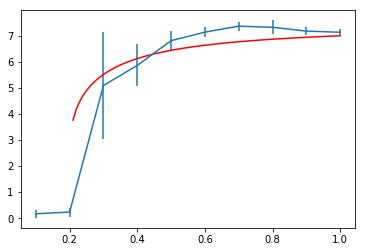

In [71]:
sth = np.loadtxt('sz10.txt')
sdx = np.loadtxt('sd10.txt')
plt.errorbar([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],sth,sdx)
plt.plot(ActiveMotorRatio,Vplus,'r-') #,ActiveMotorRatio,Vminus,'b.',ActiveMotorRatioCritical,0.0,'ro')


In [72]:
sdx

array([0.1589573, 0.1726974, 2.0459541, 0.8027931, 0.3562514, 0.2012568,
       0.1699733, 0.2706943, 0.168075 , 0.1183896])

In [73]:
sth

array([0.1684138, 0.2337198, 5.0900066, 5.8620535, 6.8109859, 7.1395484,
       7.3679818, 7.3247439, 7.1799009, 7.1338361])

In [74]:
ActiveMotorRatio

array([0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99, 1.  ])